# Previsão de fluxo de clientes em um aeroporto

* **Sobre:** O projeto consiste em uma previsão sobre o fluxo de clientes em um aeroporto fictício, com base nos padrões presentes em uma Série Temporal. Este tipo de planejamento futuro pode ser útil para escolher o momento certo para expansão de um negócio, saber quando a demanda de matéria prima e mão de obra será maior, quando fazer uma promoção ou captação ativa de clientes, e afins.

* **Base de Dados:** Quantidade de passageiros computados em um determinado mês e ano.

* **Referências:** 
  * Estudo desenvolvido acompanhando o curso [Deep Learning: previsão com Keras](https://cursos.alura.com.br/course/deep-learning-previsao-keras), da Alura.

## Abertura do Dataset

In [1]:
import pandas as pd

In [2]:
passageiros = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv')
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


* A variável tempo foi definida da seguinte forma:
  * Ano: parte inteira
  * Mês: parte decimal, em que cada mês é representado pelo seu ordinal no ano e dividido por 12. (exemplo: setembro = 9/12, ano + 9/12)

* O dataset é uma série temporal.

## Primeiras visualizações

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

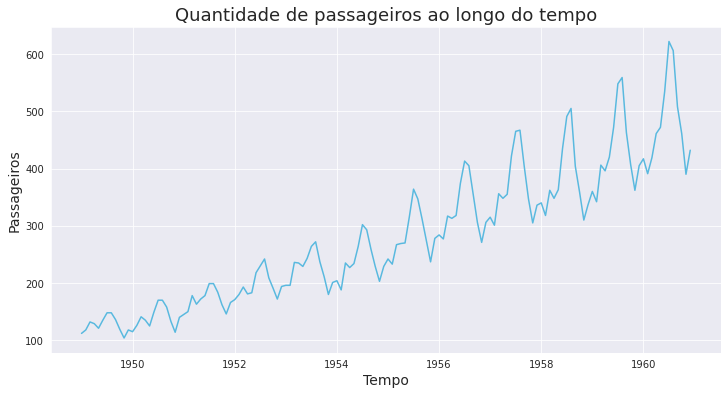

In [4]:
sns.set_style("dark")
sns.set_palette(['#59b9df', '#3fc79c', '#c6a3fb'])
plt.figure(figsize = (12, 6))

sns.lineplot(data = passageiros, x = 'tempo', y = 'passageiros')

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Quantidade de passageiros ao longo do tempo', fontsize = 18)
plt.grid(True)

plt.show()

* Há tanto um padrão de crescimento global, quanto um outro padrão que se repete anualmente.

# Pré-processamento dos dados

## Escalonamento

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()
sc.fit(passageiros)

StandardScaler()

In [7]:
scaled_data = sc.transform(passageiros)

In [8]:
X = scaled_data[:,0]
y = scaled_data[:,1]

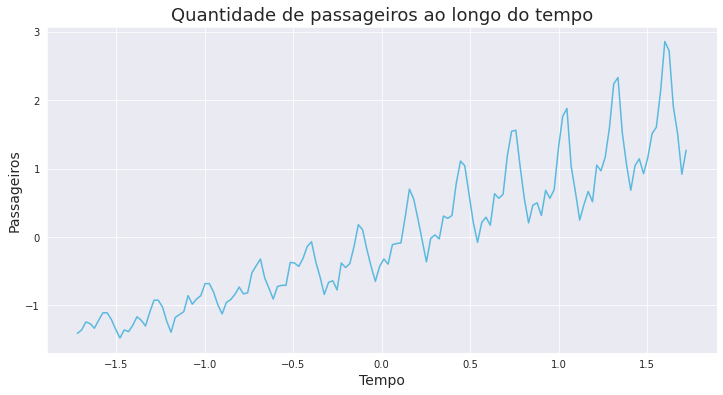

In [9]:
sns.set_style("dark")
plt.figure(figsize = (12, 6))

sns.lineplot(x = X, y = y)

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Quantidade de passageiros ao longo do tempo', fontsize = 18)
plt.grid(True)

plt.show()

* O comportamento permanece o mesmo, mas as escalas foram alteradas.

## Conjuntos de treino e teste

* Os conjuntos foram separados com cortes de arrays para que o conjunto de teste possua os números de passageiros mais recentes, representando o que seria a previsão do modelo.

In [10]:
train_size = int(len(passageiros) * 0.9)
test_size = len(passageiros) - train_size

X_train = X[0:train_size]
y_train = y[0:train_size]

X_test = X[train_size:len(passageiros)]
y_test = y[train_size:len(passageiros)]

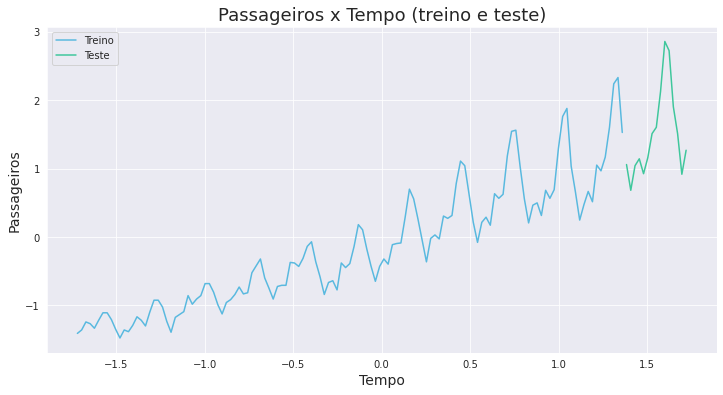

In [11]:
sns.set_style("dark")
plt.figure(figsize = (12, 6))

sns.lineplot(x = X_train, y = y_train, label = 'Treino')
sns.lineplot(x = X_test, y = y_test, label = 'Teste')

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Passageiros x Tempo (treino e teste)', fontsize = 18)
plt.grid(True)

plt.show()

# Regressão Linear

In [12]:
from keras.models import Sequential
from keras.layers import Dense

## Com viés

* Neste primeiro modelo, todos os pesos serão inicializados com 1, com viés, e ativação linear. 

In [13]:
regressor = Sequential()

regressor.add(Dense(1, input_dim = 1, 
                    kernel_initializer = 'Ones', use_bias = True, 
                    activation = 'linear'))

* **Avaliação de perda: Erro Quadrático Médio (MSE)** 
  * $MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$
  * Calcula o erro através da diferença entre o valor calculado (encontrado pela rede, Y previsto) e o valor real (Y real). 
  * O peso dado aos maiores erros será maior graças à elevação ao quadrado.
  * Essa métrica é bastante sensível a outliers, mas entradas assim não foram idenficiadas no dataset.
  * [Métricas de avaliação para séries temporais](https://www.alura.com.br/artigos/metricas-de-avaliacao-para-series-temporais#:~:text=O%20erro%20quadr%C3%A1tico%20m%C3%A9dio%2C%20MSE,desses%20erros%20quadr%C3%A1ticos%20%C3%A9%20calculada.)

* **Otimizador: Adam**
  * [Dive into Deep Learning](https://pt.d2l.ai/chapter_optimization/adam.html)
  * [Documentação](https://keras.io/api/optimizers/adam/)

In [14]:
regressor.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [15]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [16]:
regressor.fit(X_train, y_train)

5/5 [==============================] - 1s 3ms/step - loss: 0.1285


In [17]:
y_predict = regressor.predict(X_train)

5/5 [==============================] - 0s 3ms/step


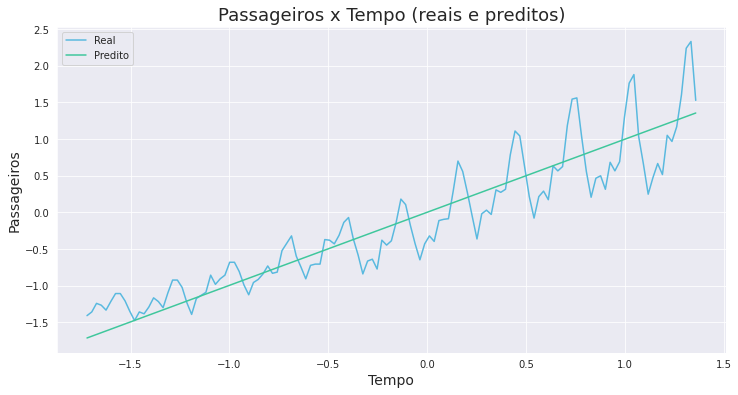

In [18]:
plt.figure(figsize = (12, 6))

sns.lineplot(x = X_train, y = y_train, label = 'Real')
sns.lineplot(x = X_train, y = y_predict[:,0], label = 'Predito')

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Passageiros x Tempo (reais e preditos)', fontsize = 18)
plt.grid(True)

plt.show()

## Sem viés

In [72]:
regressor = Sequential()

regressor.add(Dense(1, input_dim = 1, 
                    kernel_initializer = 'Ones', use_bias = False, 
                    activation = 'linear'))

regressor.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

regressor.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


* A quantidade de parâmetros foi diminuída para 1, já que não tem mais o viés. 

* É desejável diminuir a quantidade de parâmetros sem prejudicar a rede.

In [73]:
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_train)

5/5 [==============================] - 0s 2ms/step


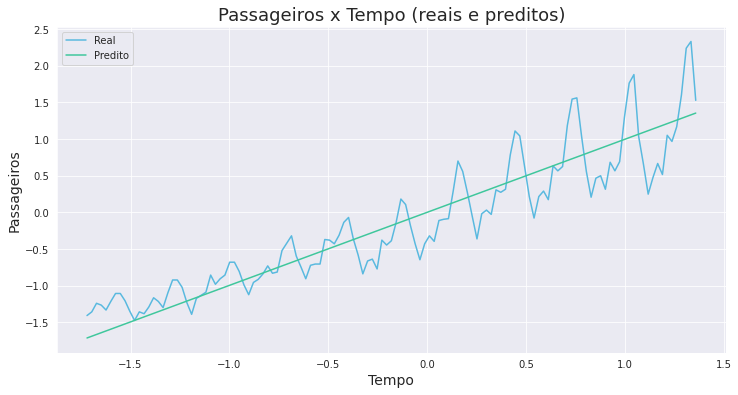

In [74]:
plt.figure(figsize = (12, 6))

sns.lineplot(x = X_train, y = y_train, label = 'Real')
sns.lineplot(x = X_train, y = y_predict[:,0], label = 'Predito')

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Passageiros x Tempo (reais e preditos)', fontsize = 18)
plt.grid(True)

plt.show()

* Os resultados foram praticamente os mesmos, então o use_bias permanecerá False.

* O modelo utilizando Regressão Linear gerou uma reta crescente que acompanha o aumento gradativo de clientes do aeroporto, ano após ano.

* Entretanto, apenas com o modelo linear não é possível representar o padrão de picos anuais. É necessário um modelo mais complexo.

# Convertendo o resultado para o número de passageiros

* Devido ao Escalonamento, é necessária uma conversão para números reais de passageiros, com uma Transformação Inversa.

In [75]:
d = {'tempo' : X_train, 'passageiros' : y_predict[:,0]}
resultados = pd.DataFrame(data = d)
resultados.head()

,tempo,passageiros
0,-1.720064,-1.713704
1,-1.696007,-1.689736
2,-1.671950,-1.665768
3,-1.647894,-1.641800
4,-1.623837,-1.617832


In [76]:
resultados_transf = pd.DataFrame(sc.inverse_transform(resultados))
resultados_transf.columns = ['tempo', 'passageiros']
resultados_transf.head()

,tempo,passageiros
0,1949.000000,75.426942
1,1949.083333,78.292277
2,1949.166667,81.157626
3,1949.250000,84.022946
4,1949.333333,86.888296


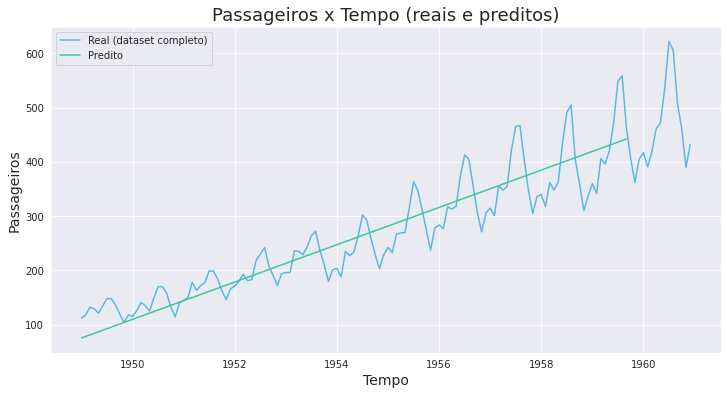

In [77]:
plt.figure(figsize = (12, 6))

sns.lineplot(data = passageiros, x = 'tempo', y = 'passageiros', label = 'Real (dataset completo)')
sns.lineplot(data = resultados_transf, x = 'tempo', y = 'passageiros', label = 'Predito')

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Passageiros x Tempo (reais e preditos)', fontsize = 18)
plt.grid(True)

plt.show()

# Predição sobre dados de Teste

In [78]:
y_predict_test = regressor.predict(X_test)

1/1 [==============================] - 0s 21ms/step


In [79]:
d = {'tempo' : X_test, 'passageiros' : y_predict_test[:,0]}
test_results = pd.DataFrame(data = d)
test_results.head()

,tempo,passageiros
0,1.383268,1.378154
1,1.407325,1.402122
2,1.431382,1.426089
3,1.455439,1.450057
4,1.479496,1.474025


In [80]:
test_results_transf = pd.DataFrame(sc.inverse_transform(test_results))
test_results_transf.columns = ['tempo', 'passageiros']
test_results_transf.head()

,tempo,passageiros
0,1959.750000,445.055549
1,1959.833333,447.920898
2,1959.916667,450.786218
3,1960.000000,453.651553
4,1960.083333,456.516903


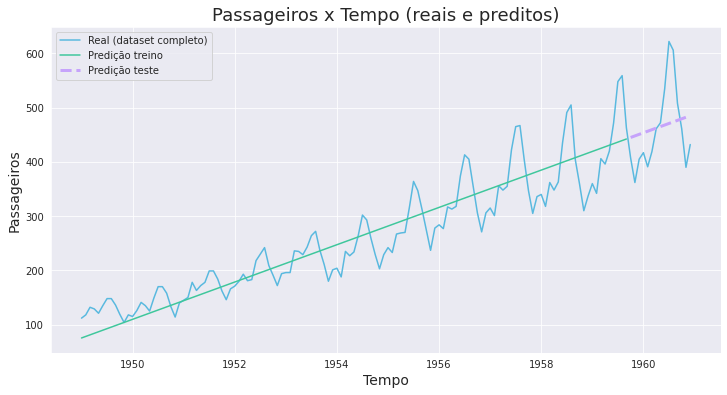

In [81]:
plt.figure(figsize = (12, 6))

sns.lineplot(data = passageiros, x = 'tempo', y = 'passageiros', label = 'Real (dataset completo)')
sns.lineplot(data = resultados_transf, x = 'tempo', y = 'passageiros', label = 'Predição treino')
sns.lineplot(data = test_results_transf, x = 'tempo', y = 'passageiros', label = 'Predição teste', lw = 3, ls = '--')

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Passageiros x Tempo (reais e preditos)', fontsize = 18)
plt.grid(True)

plt.show()

In [82]:
test_loss, test_accuracy = regressor.evaluate(X_test, y_test)
print(f'Perda: {test_loss}')
print(f'Acurácia: {test_accuracy}')

1/1 [==============================] - 0s 91ms/step - loss: 0.3534 - accuracy: 0.0000e+00
Perda: 0.353384792804718
Acurácia: 0.0


# Modelo 2: Adicionando camadas escondidas

## Ativação linear

* A camada irá receber apenas um valor, a data, e terá 8 neurônios.
* A inicialização dos pesos será aleatória com distribuição uniforme.
* Função de ativação linear.
* Viéses desativados.

In [58]:
regressor2 = Sequential()

regressor2.add( # camada de entrada
    Dense(8, input_dim = 1, kernel_initializer = 'random_uniform',
          activation = 'linear', use_bias = False)
)

regressor2.add( # camada escondida
    Dense(8, kernel_initializer = 'random_uniform',
          activation = 'linear', use_bias = False)
)

regressor2.add( # camada de saída
    Dense(1, kernel_initializer = 'random_uniform',
          activation = 'linear', use_bias = False)
)

regressor2.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

In [59]:
regressor2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 8)                 8         
                                                                 
 dense_12 (Dense)            (None, 8)                 64        
                                                                 
 dense_13 (Dense)            (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


* O valor de épocas foi aumentando para 200, o padrão é 5.

In [62]:
regressor2.fit(X_train, y_train, epochs = 200, verbose = 0)

### Predições

In [63]:
y_predict = regressor2.predict(X_train)
y_predict_test = regressor2.predict(X_test)

1/1 [==============================] - 0s 20ms/step


#### Tranformação do teste

In [64]:
d = {'tempo' : X_test, 'passageiros' : y_predict_test[:,0]}
test_results = pd.DataFrame(data = d)

test_results_transf = pd.DataFrame(sc.inverse_transform(test_results))
test_results_transf.columns = ['tempo', 'passageiros']
test_results_transf.head()

,tempo,passageiros
0,1959.750000,426.410143
1,1959.833333,428.951231
2,1959.916667,431.492291
3,1960.000000,434.033350
4,1960.083333,436.574424


#### Transformação do treino

In [65]:
d = {'tempo' : X_train, 'passageiros' : y_predict[:,0]}
train_results = pd.DataFrame(data = d)

train_results_transf = pd.DataFrame(sc.inverse_transform(train_results))
train_results_transf.columns = ['tempo', 'passageiros']
train_results_transf.head()

,tempo,passageiros
0,1949.000000,98.612088
1,1949.083333,101.153148
2,1949.166667,103.694236
3,1949.250000,106.235281
4,1949.333333,108.776370


## Gráfico

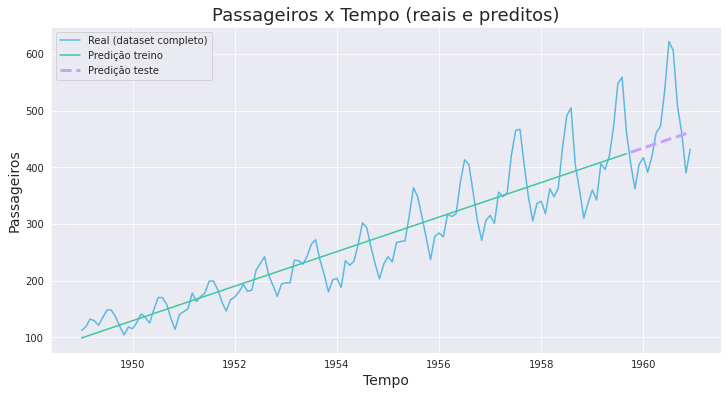

In [66]:
plt.figure(figsize = (12, 6))

sns.lineplot(data = passageiros, x = 'tempo', y = 'passageiros', label = 'Real (dataset completo)')
sns.lineplot(data = train_results_transf, x = 'tempo', y = 'passageiros', label = 'Predição treino')
sns.lineplot(data = test_results_transf, x = 'tempo', y = 'passageiros', label = 'Predição teste', lw = 3, ls = '--')

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Passageiros x Tempo (reais e preditos)', fontsize = 18)
plt.grid(True)

plt.show()

In [70]:
test_loss, test_accuracy = regressor2.evaluate(X_test, y_test)
print(f'Perda: {test_loss}')
print(f'Acurácia: {test_accuracy}')

1/1 [==============================] - 0s 23ms/step - loss: 0.3708 - accuracy: 0.0000e+00
Perda: 0.37078598141670227
Acurácia: 0.0


## Ativação não-linear: Sigmoid

In [83]:
regressor2 = Sequential()

regressor2.add( # camada de entrada
    Dense(8, input_dim = 1, kernel_initializer = 'random_uniform',
          activation = 'sigmoid', use_bias = False)
)

regressor2.add( # camada escondida
    Dense(8, kernel_initializer = 'random_uniform',
          activation = 'sigmoid', use_bias = False)
)

regressor2.add( # camada de saída
    Dense(1, kernel_initializer = 'random_uniform',
          activation = 'linear', use_bias = False)
)

regressor2.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

In [84]:
regressor2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8)                 8         
                                                                 
 dense_16 (Dense)            (None, 8)                 64        
                                                                 
 dense_17 (Dense)            (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


* A estrutura da rede não mudou, apenas a função de ativação.

* A seguir, o modelo será treinado por 500 épocas.

In [85]:
regressor2.fit(X_train, y_train, epochs = 500, verbose = 0)

### Predições

In [86]:
y_predict = regressor2.predict(X_train)
y_predict_test = regressor2.predict(X_test)

1/1 [==============================] - 0s 14ms/step


#### Transformações

In [87]:
d = {'tempo' : X_test, 'passageiros' : y_predict_test[:,0]}
test_results = pd.DataFrame(data = d)

test_results_transf = pd.DataFrame(sc.inverse_transform(test_results))
test_results_transf.columns = ['tempo', 'passageiros']
test_results_transf.head()

,tempo,passageiros
0,1959.750000,337.363436
1,1959.833333,337.691509
2,1959.916667,337.999029
3,1960.000000,338.287223
4,1960.083333,338.557272


In [88]:
d = {'tempo' : X_train, 'passageiros' : y_predict[:,0]}
train_results = pd.DataFrame(data = d)

train_results_transf = pd.DataFrame(sc.inverse_transform(train_results))
train_results_transf.columns = ['tempo', 'passageiros']
train_results_transf.head()

,tempo,passageiros
0,1949.000000,195.850696
1,1949.083333,195.872629
2,1949.166667,195.896108
3,1949.250000,195.921226
4,1949.333333,195.948118


## Gráfico

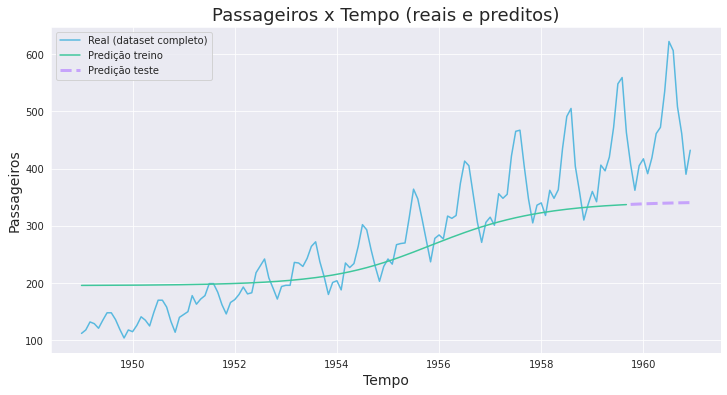

In [89]:
plt.figure(figsize = (12, 6))

sns.lineplot(data = passageiros, x = 'tempo', y = 'passageiros', label = 'Real (dataset completo)')
sns.lineplot(data = train_results_transf, x = 'tempo', y = 'passageiros', label = 'Predição treino')
sns.lineplot(data = test_results_transf, x = 'tempo', y = 'passageiros', label = 'Predição teste', lw = 3, ls = '--')

plt.xlabel('Tempo', fontsize = 14)
plt.ylabel('Passageiros', fontsize = 14)
plt.title('Passageiros x Tempo (reais e preditos)', fontsize = 18)
plt.grid(True)

plt.show()

In [95]:
test_loss, test_accuracy = regressor2.evaluate(X_test, y_test)
print(f'Perda: {test_loss}')
print(f'Acurácia: {test_accuracy}')

1/1 [==============================] - 0s 59ms/step - loss: 1.4004 - accuracy: 0.0000e+00
Perda: 1.4004290103912354
Acurácia: 0.0


* Apesar do modelo estar se tornando mais complexo, a perda está aumentando.